# Homework 3

## Question 1

### 1a
The applicant has approximately a 45% probability of being admitted to the bootcamp.

### 1b
In order to have a 90% probability of being admitted to the bootfcamp, an applicant with 2 years of years would need approximately 120 hours of coding practice.

### 1c
β0 represents the intercept; it is used to calculate what we expect when an applicant has zero coding practice hours and zero years of prior programming experience. In essence, P(Y) = (e^β0) / (1 + e^β0) = 0.015 for an applicant with no experience, which means we expect this applicant to have a 1.5% chance to be admitted to the camp.

## Question 2
(Creating Train & Test Subsets)

In [50]:
from ISLP import load_data

OJ = load_data('OJ')
OJ_train = OJ.loc[OJ['Store7'] == 'No']
OJ_test = OJ.loc[OJ['Store7'] == 'Yes']



### 2a

LoyalCH - Mean: 0.519988, Standard Deviation: 0.313757, Median: 0.5, Min: 0.000011, Max: 0.999947  
SpecialCH - Mean: 0.046218, Standard Deviation: 0.210105, Median: 0, Min: 0, Max: 1  
PriceDiff - Mean: 0.114524, Standard Deviation: 0.255935, Median: 0.2, Min: -0.67, Max: 0.44  

In [51]:
train_subset_a = OJ_train[['LoyalCH','SpecialCH','PriceDiff']]

train_subset_a.describe()

#LoyalCH: Customer brand loyalty for CH
#SpecialCH: Indicator of special on CH
#PriceDiff: Sale price of MM less sale price of CH

,LoyalCH,SpecialCH,PriceDiff
count,714.000000,714.000000,714.000000
mean,0.519988,0.046218,0.114524
std,0.313757,0.210105,0.255935
min,0.000011,0.000000,-0.670000
25%,0.272261,0.000000,0.000000
50%,0.500000,0.000000,0.200000
75%,0.795200,0.000000,0.300000
max,0.999947,1.000000,0.440000


### 2b

In [52]:
corr_matrix_a = train_subset_a.corr()
corr_matrix_a

,LoyalCH,SpecialCH,PriceDiff
LoyalCH,1.000000,0.014230,0.008349
SpecialCH,0.014230,1.000000,-0.025542
PriceDiff,0.008349,-0.025542,1.000000


### 2c
LoyalCH and PriceDiff appear to be statistically signficant as their p-values are very low (near zero). SpecialCH does not appear to by statistically significant as it has a p-value of 0.68.

C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\741299931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['intercept'] = np.ones(x_train.shape[0])
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\741299931.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train = y_train.replace('CH', True)
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\741299931.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_

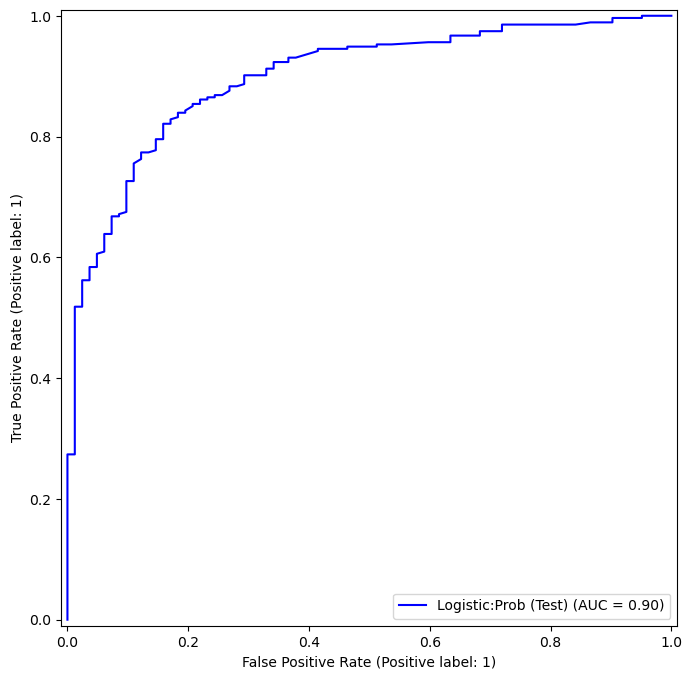

In [ ]:
import statsmodels.api as sm
from ISLP.models import summarize
import numpy as np

x_train = train_subset_a
x_train['intercept'] = np.ones(x_train.shape[0])
y_train = OJ_train[['Purchase']]
#Purchase: A factor with levels ‘CH’ and ‘MM’ 
#indicating whether the customer purchased Citrus Hill or Minute Maid
y_train = y_train.replace('CH', True)
y_train = y_train.replace('MM', False)

glm = sm.GLM(y_train,
             x_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

### 2d
The fraction of correct predictions is 299/356 = 84.0%. The percent of false positives is 20/82 = 24.3%. The percent of false negatives is 37/274 =  13.5%.
(Note that True = Purchased CH, False = Purchased MM)

In [54]:
from ISLP import confusion_table
import pandas as pd

x_test = OJ_test[['LoyalCH','SpecialCH','PriceDiff']]
x_test['intercept'] = np.ones(x_test.shape[0])

y_test = OJ_test[['Purchase']]
y_test = y_test.replace('CH', True)
y_test = y_test.replace('MM', False)

def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

probs_test = predict(x_test,results)
predictions_test = np.array([True]*len(y_test))
predictions_test[probs_test<0.5] = False

confusion_table(predictions_test, y_test)
#


C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\153827929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['intercept'] = np.ones(x_test.shape[0])
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\153827929.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_test = y_test.replace('CH', True)
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\153827929.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

Truth,False,True
Predicted,,
False,62,37
True,20,237


### 2e
The overall fraction of correct predictions is 300/356 = 84.3%. The percent of false positives is 22/82 = 26.8%. The percent of false positives is 34/274 =  12.4%.

In [55]:
x_train = OJ_train[['LoyalCH','PriceDiff']]
x_train['intercept'] = np.ones(x_train.shape[0])
y_train = OJ_train[['Purchase']]

y_train = y_train.replace('CH', True)
y_train = y_train.replace('MM', False)

glm = sm.GLM(y_train,
             x_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

x_test = OJ_test[['LoyalCH','PriceDiff']]
x_test['intercept'] = np.ones(x_test.shape[0])

y_test = OJ_test[['Purchase']]
y_test = y_test.replace('CH', True)
y_test = y_test.replace('MM', False)


probs_test = predict(x_test,results)
predictions_test = np.array([True]*len(y_test))
predictions_test[probs_test<0.5] = False

confusion_table(predictions_test, y_test)

C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\581616377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['intercept'] = np.ones(x_train.shape[0])
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\581616377.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train = y_train.replace('CH', True)
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\581616377.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

Truth,False,True
Predicted,,
False,60,34
True,22,240


### 2f
The overall fraction of correct predictions is 299/356 = 84.0%. The percent of false positives is 18/82 = 22.0%. The percent of false positives is 39/274 =  14.2%.
(Note that axes for actual and predicted are reversed for this confusion matrix).

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

x_train = OJ_train[['LoyalCH','PriceDiff']]
x_train['intercept'] = np.ones(x_train.shape[0])

y_train = OJ_train[['Purchase']]
y_train = y_train.replace('CH', True)
y_train = y_train.replace('MM', False)

x_test = OJ_test[['LoyalCH','PriceDiff']]
x_test['intercept'] = np.ones(x_test.shape[0])

y_test = OJ_test[['Purchase']]
y_test = y_test.replace('CH', True)
y_test = y_test.replace('MM', False)

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=[True, False])
cm_df = pd.DataFrame(cm, index=['Actual True', 'Actual False'], columns=['Predicted True', 'Predicted False'])

cm_df



C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\1533843047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['intercept'] = np.ones(x_train.shape[0])
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\1533843047.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train = y_train.replace('CH', True)
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\1533843047.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

,Predicted True,Predicted False
Actual True,235,39
Actual False,18,64


### 2g
For k=50, the overall fraction of correct predictions is 295/356 = 82.9%. The percent of false positives is 19/82 = 23.2%. The percent of false positives is 42/274 = 15.3%.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

x_train = OJ_train[['LoyalCH','PriceDiff']]
x_train['intercept'] = np.ones(x_train.shape[0])
x_train_knn = np.asarray(x_train)

y_train = OJ_train[['Purchase']]
y_train = y_train.replace('CH', True)
y_train = y_train.replace('MM', False)

x_test = OJ_test[['LoyalCH','PriceDiff']]
x_test['intercept'] = np.ones(x_test.shape[0])
x_test_knn = np.asarray(x_test)

y_test = OJ_test[['Purchase']]
y_test = y_test.replace('CH', True)
y_test = y_test.replace('MM', False)


knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(x_train_knn, y_train)
knn50_pred = knn50.predict(x_test_knn)

confusion_table(knn50_pred, y_test)

C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\1900291960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['intercept'] = np.ones(x_train.shape[0])
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\1900291960.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train = y_train.replace('CH', True)
C:\Users\1yjac\AppData\Local\Temp\ipykernel_17796\1900291960.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

Truth,False,True
Predicted,,
False,63,42
True,19,232


In [58]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)
knn5_pred = knn5.predict(x_test)

confusion_table(knn5_pred, y_test)

c:\Users\1yjac\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Truth,False,True
Predicted,,
False,60,47
True,22,227


In [59]:
knn150 = KNeighborsClassifier(n_neighbors=150)
knn150.fit(x_train, y_train)
knn150_pred = knn150.predict(x_test)

confusion_table(knn150_pred, y_test)

c:\Users\1yjac\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Truth,False,True
Predicted,,
False,60,39
True,22,235


### 2h
Logistic regression and k-nearest neighbors with k=50 have the highest AUC, with AUC = .90. Naive Bayes is close behind with AUC = 0.89.

c:\Users\1yjac\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\1yjac\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


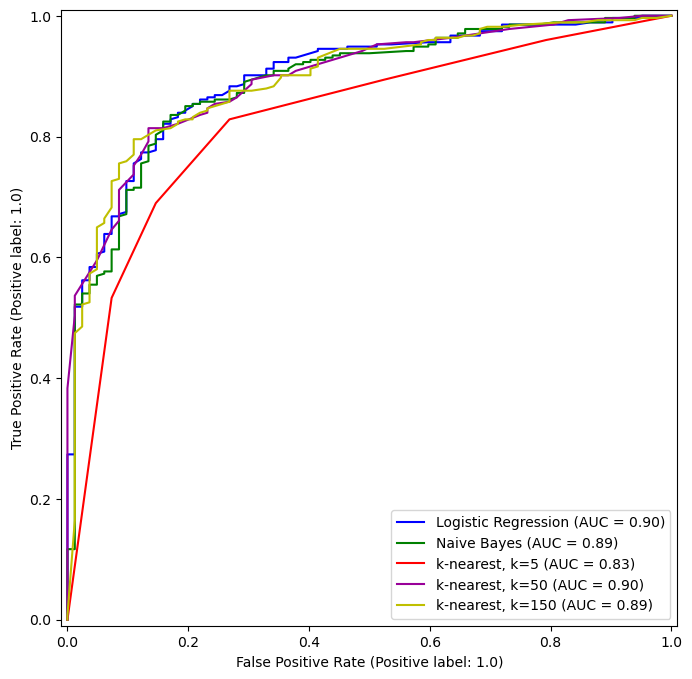

In [77]:
from matplotlib.pyplot import subplots
from sklearn.metrics import RocCurveDisplay
roc_curve_est = RocCurveDisplay.from_estimator 
roc_curve_pred = RocCurveDisplay.from_predictions 

fig, ax = subplots(figsize=(8,8))

#adding logistic regression
roc_curve_pred(y_test,
               probs_test,
               name='Logistic Regression',
               color='b',
               ax=ax)

#adding Naive Bayes
roc_curve_est(nb_model,
               x_test,
               y_test,
               name='Naive Bayes',
               color='g',
               ax=ax)

#adding k-nearest neighbors
roc_curve_est(knn5,
              x_test_knn,
              y_test,
              name='k-nearest, k=5',
              color='r',
              ax=ax)

roc_curve_est(knn50,
              x_test_knn,
              y_test,
              name='k-nearest, k=50',
              color='#909',
              ax=ax)

roc_curve_est(knn150,
              x_test_knn,
              y_test,
              name='k-nearest, k=150',
              color='y',
              ax=ax)

## Question 3

### 3a

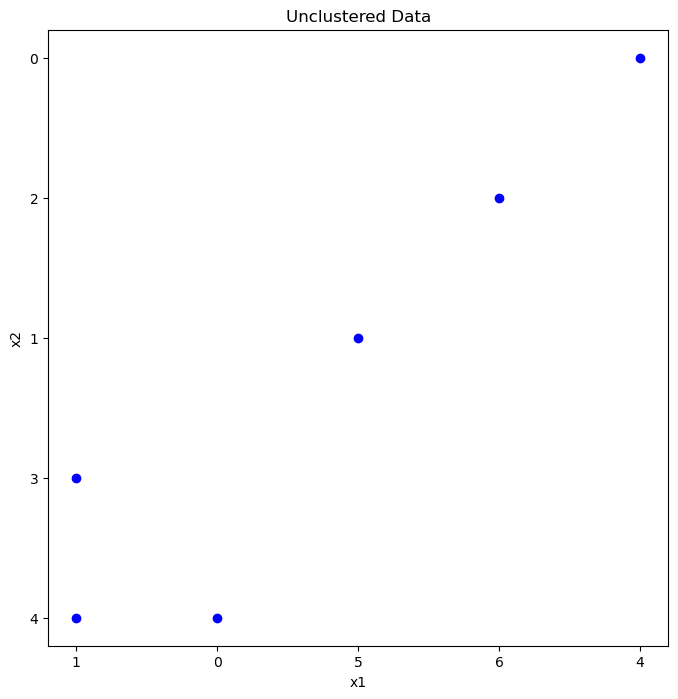

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([
    [1,4,'b'],
    [1,3,'b'],
    [0,4,'b'],
    [5,1,'b'],
    [6,2,'b'],
    [4,0,'b']
])

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(x[:,0], x[:,1], c = 'b')

ax.set_title("Unclustered Data")
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

### 3b
The first two columns represent x1 and x2. The third column represents the cluster the observation is in ('r' for red, 'b' for blue).

In [19]:
np.random.seed(42)

for observation in x:
    color = np.random.choice(['r','b'])
    observation[2] = color

print(x)

[['1' '4' 'r']
 ['1' '3' 'b']
 ['0' '4' 'r']
 ['5' '1' 'r']
 ['6' '2' 'r']
 ['4' '0' 'b']]


### 3c

In [ ]:
r_centroid = (0,0)
r_array = []
b_centroid = (0,0)
b_array = []

for obs in x:
    if obs[2] == 'r':
        r_array.append(obs[:2])
    if obs[2] == 'b':
        b_array.append(obs[:2])

r_array = np.array(r_array).astype(int)
b_array = np.array(b_array).astype(int)

r_centroid = np.mean(r_array, axis=0)
b_centroid = np.mean(b_array, axis=0)
#axis = 0 calculates mean across columns
#point which is (mean(x1), mean(x2)) is centroid
print(f'Red Centroid: ({r_centroid[0]}, {r_centroid[1]}), Blue Centroid: ({b_centroid[0]}, {b_centroid[1]})')

[[1 4]
 [0 4]
 [5 1]
 [6 2]]
Red Centroid: (3.0, 2.75), Blue Centroid: (2.5, 1.5)


### 3d

In [34]:
def distance(point1, point2):

    point1 = np.asarray(point1)
    point2 = np.asarray(point2)

    diff = point1 - point2
    squared_diff = diff**2
    sum_sq_diff = np.sum(squared_diff)
    distance = np.sqrt(sum_sq_diff)

    return distance

for obs in x:
    r_dist = distance(obs[:2].astype(int), r_centroid.astype(int))
    b_dist = distance(obs[:2].astype(int), b_centroid.astype(int))
    if r_dist < b_dist:
        obs[2] = 'r'
    else:
        obs[2] = 'b'

print(x)

[['1' '4' 'r']
 ['1' '3' 'b']
 ['0' '4' 'b']
 ['5' '1' 'r']
 ['6' '2' 'r']
 ['4' '0' 'b']]


### 3e

In [35]:
r_centroid = (0,0)
r_array = []
b_centroid = (0,0)
b_array = []

for obs in x:
    if obs[2] == 'r':
        r_array.append(obs[:2])
    if obs[2] == 'b':
        b_array.append(obs[:2])

r_array = np.array(r_array).astype(int)
b_array = np.array(b_array).astype(int)

r_centroid = np.mean(r_array, axis=0)
b_centroid = np.mean(b_array, axis=0)
#axis = 0 calculates mean across columns
#point which is (mean(x1), mean(x2)) is centroid
print(f'Red Centroid: ({r_centroid[0]}, {r_centroid[1]}), Blue Centroid: ({b_centroid[0]}, {b_centroid[1]})')

for obs in x:
    r_dist = distance(obs[:2].astype(int), r_centroid.astype(int))
    b_dist = distance(obs[:2].astype(int), b_centroid.astype(int))
    if r_dist < b_dist:
        obs[2] = 'r'
    else:
        obs[2] = 'b'

print(x)

Red Centroid: (4.0, 2.3333333333333335), Blue Centroid: (1.6666666666666667, 2.3333333333333335)
[['1' '4' 'b']
 ['1' '3' 'b']
 ['0' '4' 'b']
 ['5' '1' 'r']
 ['6' '2' 'r']
 ['4' '0' 'r']]


In [36]:
r_centroid = (0,0)
r_array = []
b_centroid = (0,0)
b_array = []

for obs in x:
    if obs[2] == 'r':
        r_array.append(obs[:2])
    if obs[2] == 'b':
        b_array.append(obs[:2])

r_array = np.array(r_array).astype(int)
b_array = np.array(b_array).astype(int)

r_centroid = np.mean(r_array, axis=0)
b_centroid = np.mean(b_array, axis=0)
#axis = 0 calculates mean across columns
#point which is (mean(x1), mean(x2)) is centroid
print(f'Red Centroid: ({r_centroid[0]}, {r_centroid[1]}), Blue Centroid: ({b_centroid[0]}, {b_centroid[1]})')

for obs in x:
    r_dist = distance(obs[:2].astype(int), r_centroid.astype(int))
    b_dist = distance(obs[:2].astype(int), b_centroid.astype(int))
    if r_dist < b_dist:
        obs[2] = 'r'
    else:
        obs[2] = 'b'

print(x)

Red Centroid: (5.0, 1.0), Blue Centroid: (0.6666666666666666, 3.6666666666666665)
[['1' '4' 'b']
 ['1' '3' 'b']
 ['0' '4' 'b']
 ['5' '1' 'r']
 ['6' '2' 'r']
 ['4' '0' 'r']]


### 3f

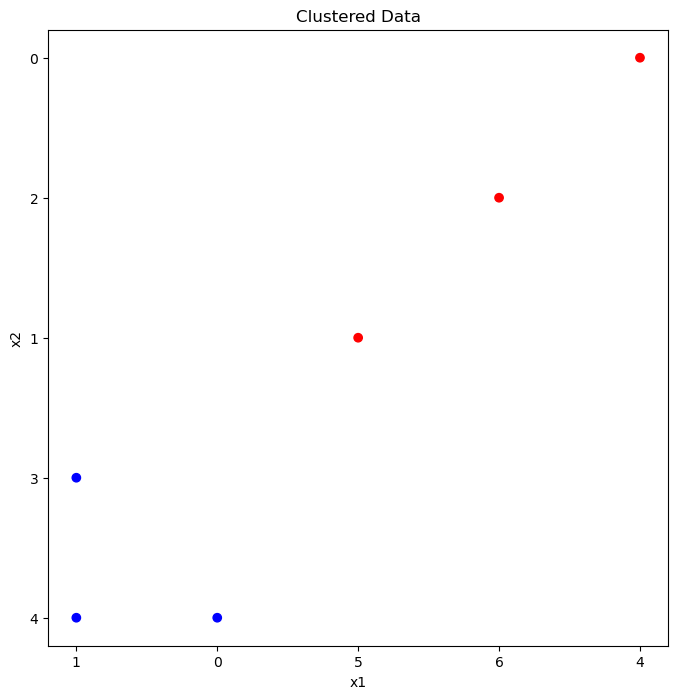

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.scatter(x[:,0], x[:,1], c = x[:,2])


ax.set_title("Clustered Data")
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

## Question 4

### 4a

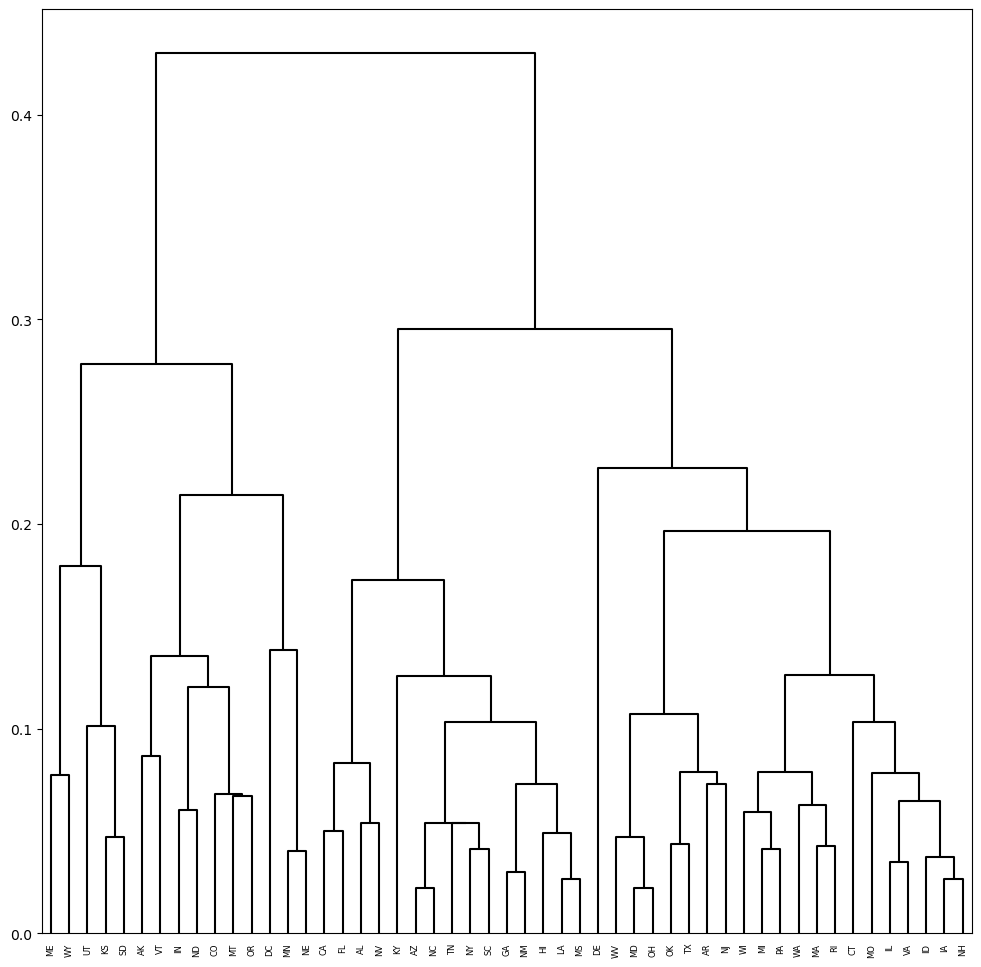

In [6]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np


cev = pd.read_csv('../data/CEV2021.csv')
#making state names act as row labels
cev = cev.set_index('State')


HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 metric = 'euclidean',
                 linkage='complete')
hc_comp.fit(cev)

linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=cev.index,
           color_threshold=-np.inf,
           above_threshold_color='black')
plt.show()

### 4b
Cluster 0: AL, AZ, CA, FL, GA, HI, LA, KY, MS, NV, NM, NY, SC, TN, NC  
Cluster 1: MN, NE, MT, KS, ME, IN, DC, WY, VT, OR, ND, SD, UT, CO, AK  
Cluster 2: CT, AR, NJ, NH, MO, MI, MA, MD, IL, IA, DE, ID, OK, PA, RI, TX, VA, OH, WA, WV, WI

       cluster
State         
AL           0
AZ           0
CA           0
FL           0
GA           0
HI           0
LA           0
KY           0
MS           0
NV           0
NM           0
NY           0
SC           0
TN           0
NC           0
MN           1
NE           1
MT           1
KS           1
ME           1
IN           1
DC           1
WY           1
VT           1
OR           1
ND           1
SD           1
UT           1
CO           1
AK           1
CT           2
AR           2
NJ           2
NH           2
MO           2
MI           2
MA           2
MD           2
IL           2
IA           2
DE           2
ID           2
OK           2
PA           2
RI           2
TX           2
VA           2
OH           2
WA           2
WV           2
WI           2


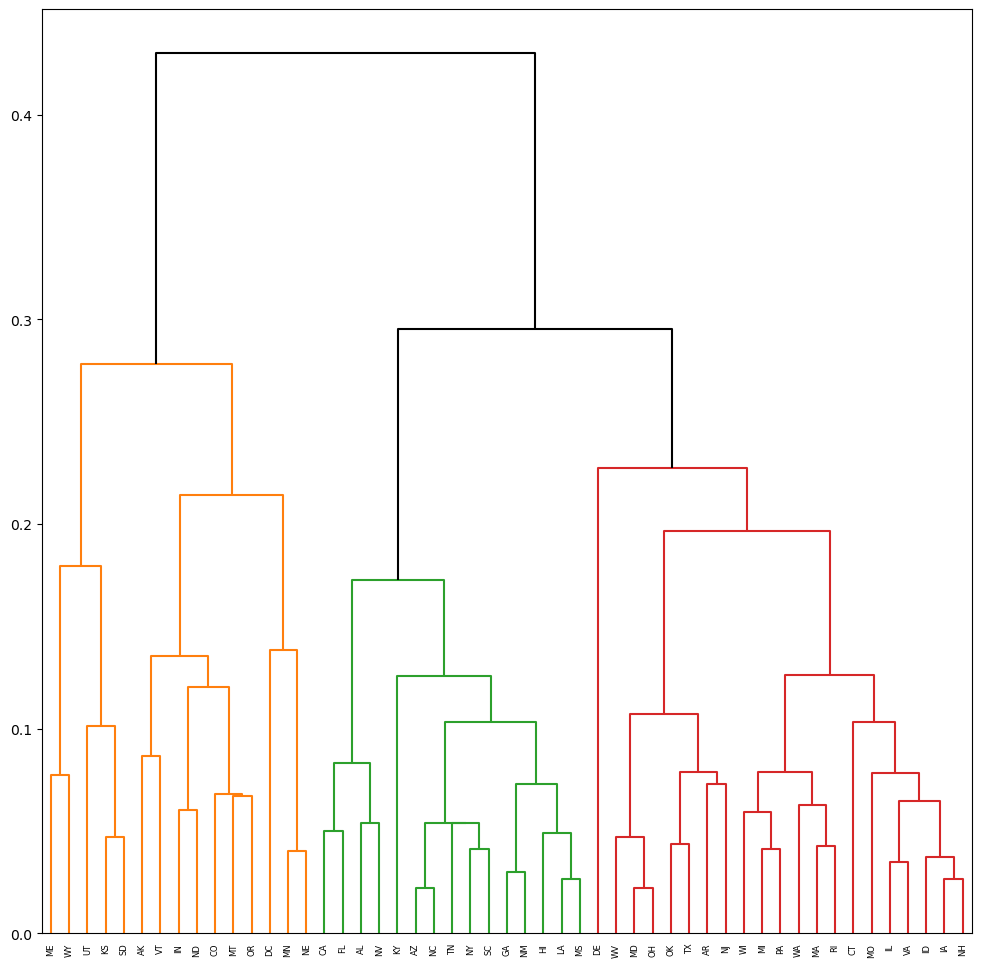

In [4]:
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import dendrogram

cev = pd.read_csv('../data/CEV2021.csv')
#making state names act as row labels
cev = cev.set_index('State')


HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 metric = 'euclidean',
                 linkage='complete')
hc_comp.fit(cev)

linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=cev.index,
           color_threshold= 0.29,
           above_threshold_color='black')

b_answer = cev.iloc[:,:]
b_answer['cluster'] = cut_tree(linkage_comp, n_clusters=3)
b_answer = b_answer.iloc[:,-1]
b_answer = b_answer.to_frame()
b_answer = b_answer.sort_values(by='cluster')


print(b_answer)


### 4c
Cluster 0: AL, AZ, CA, FL, GA, HI, LA, KY, MS, NV, NM, NY, SC, TN, NC  
Cluster 1: MT, MN, NE, VT, ND, IN, DC, CO, AK, OR  
Cluster 2: MD, IA, IL, CT, AR, ID, DE, RI, PA, NJ, NH, MA, MI, MO, OH, WA, VA, OK, TX, WI, WV  
Cluster 3: ME, KS, UT, SD, WY

       cluster
State         
AL           0
AZ           0
CA           0
FL           0
GA           0
HI           0
LA           0
KY           0
MS           0
NV           0
NM           0
NY           0
SC           0
TN           0
NC           0
MT           1
MN           1
NE           1
VT           1
ND           1
IN           1
DC           1
CO           1
AK           1
OR           1
MD           2
IA           2
IL           2
CT           2
AR           2
ID           2
DE           2
RI           2
PA           2
NJ           2
NH           2
MA           2
MI           2
MO           2
OH           2
WA           2
VA           2
OK           2
TX           2
WI           2
WV           2
ME           3
KS           3
UT           3
SD           3
WY           3


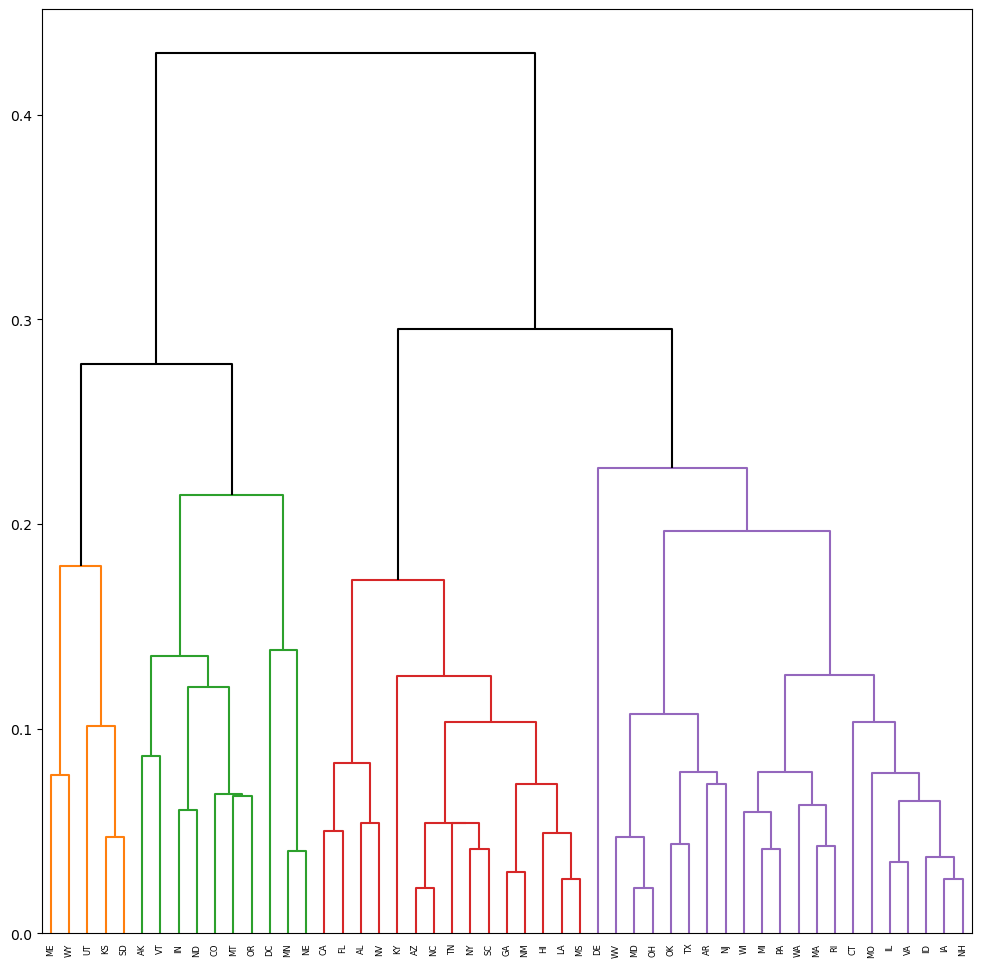

In [5]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=cev.index,
           color_threshold= 0.26,
           above_threshold_color='black')

c_answer = cev.iloc[:,:]
c_answer['cluster'] = cut_tree(linkage_comp, n_clusters=4)
c_answer = c_answer.iloc[:,-1]
c_answer = c_answer.to_frame()
c_answer = c_answer.sort_values(by='cluster')


print(c_answer)

### 4d
Cluster 0: CT, DE, IN, IA, ID, IL, MA, KS, MO, MI, NH, VA, SD, WA, RI, PA, WI   
Cluster 1: NM, NJ, FL, CA, LA, MD, KY, MS, NY, NV, AR, GA, HI, AL, AZ, TX, TN, OH, SC, WV, NC, OK  
Cluter 2: DC, MT, NE, ME, MN, CO, AK, OR, ND, UT, VT, WY

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,
                random_state=1,
                ).fit(cev)
cluster_km = pd.DataFrame(kmeans.labels_)
cluster_km.index= cev.index

c_answer = cev.iloc[:,:]
c_answer['cluster'] = cluster_km
c_answer = c_answer.iloc[:,-1]
c_answer = c_answer.to_frame()
c_answer = c_answer.sort_values(by='cluster')


print(c_answer)


       cluster
State         
CT           0
DE           0
IN           0
IA           0
ID           0
IL           0
MA           0
KS           0
MO           0
MI           0
NH           0
VA           0
SD           0
WA           0
RI           0
PA           0
WI           0
NM           1
NJ           1
FL           1
CA           1
LA           1
MD           1
KY           1
MS           1
NY           1
NV           1
AR           1
GA           1
HI           1
AL           1
AZ           1
TX           1
TN           1
OH           1
SC           1
WV           1
NC           1
OK           1
DC           2
MT           2
NE           2
ME           2
MN           2
CO           2
AK           2
OR           2
ND           2
UT           2
VT           2
WY           2


c:\Users\1yjac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 4e

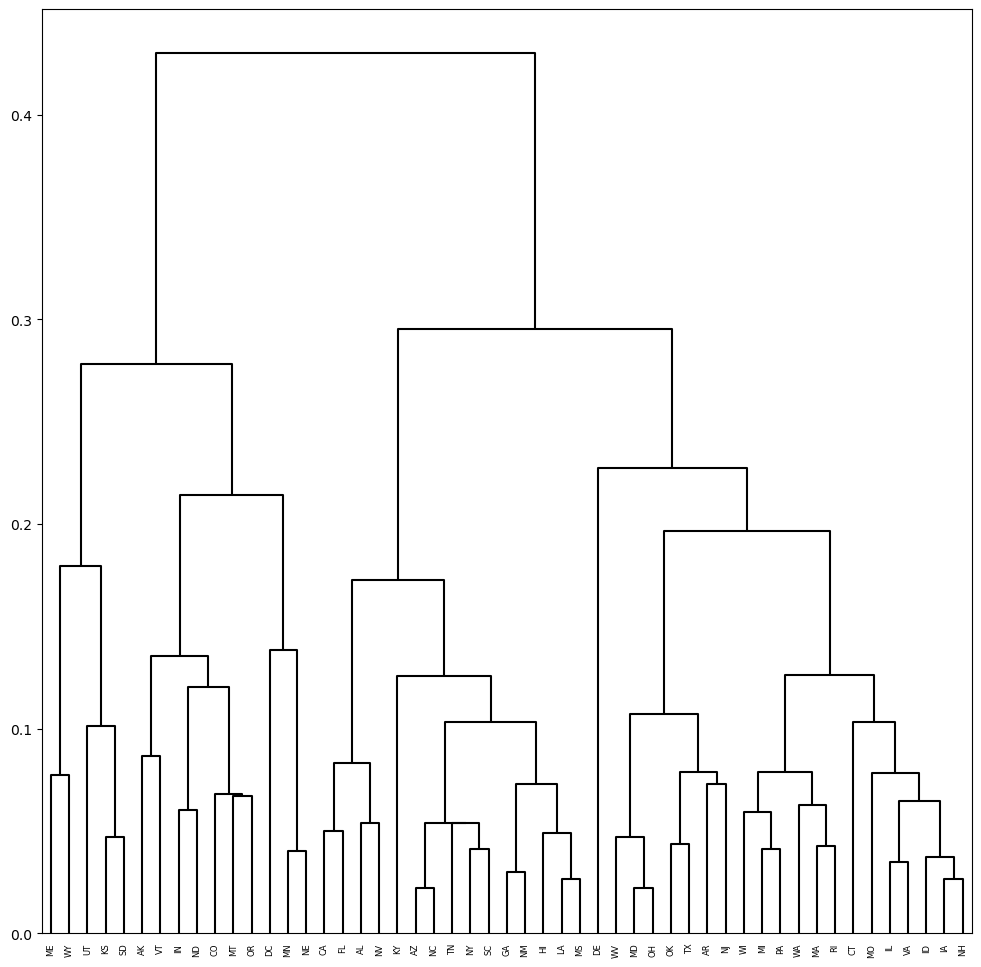

In [24]:
from sklearn.preprocessing import StandardScaler

standard_cev = cev.iloc[:,:]
scaler = StandardScaler()
standard_cev = scaler.fit_transform(standard_cev)
standard_cev = pd.DataFrame(standard_cev)

HClust = AgglomerativeClustering
hc_standard = HClust(distance_threshold=0,
                 n_clusters=None,
                 metric = 'euclidean',
                 linkage='complete')
hc_standard.fit(standard_cev)

linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=cev.index,
           color_threshold=-np.inf,
           above_threshold_color='black')
plt.show()

### 4f
Cluster 0: AL, AZ, CA, FL, GA, HI, LA, KY, MS, NV, NM, NY, SC, TN, NC  
Cluster 1: MN, NE, MT, KS, ME, IN, DC, WY, VT, OR, ND, SD, UT, CO, AK  
Cluster 2: CT, AR, NJ, NH, MO, MI, MA, MD, IL, IA, DE, ID, OK, PA, RI, TX, VA, OH, WA, WV, WI

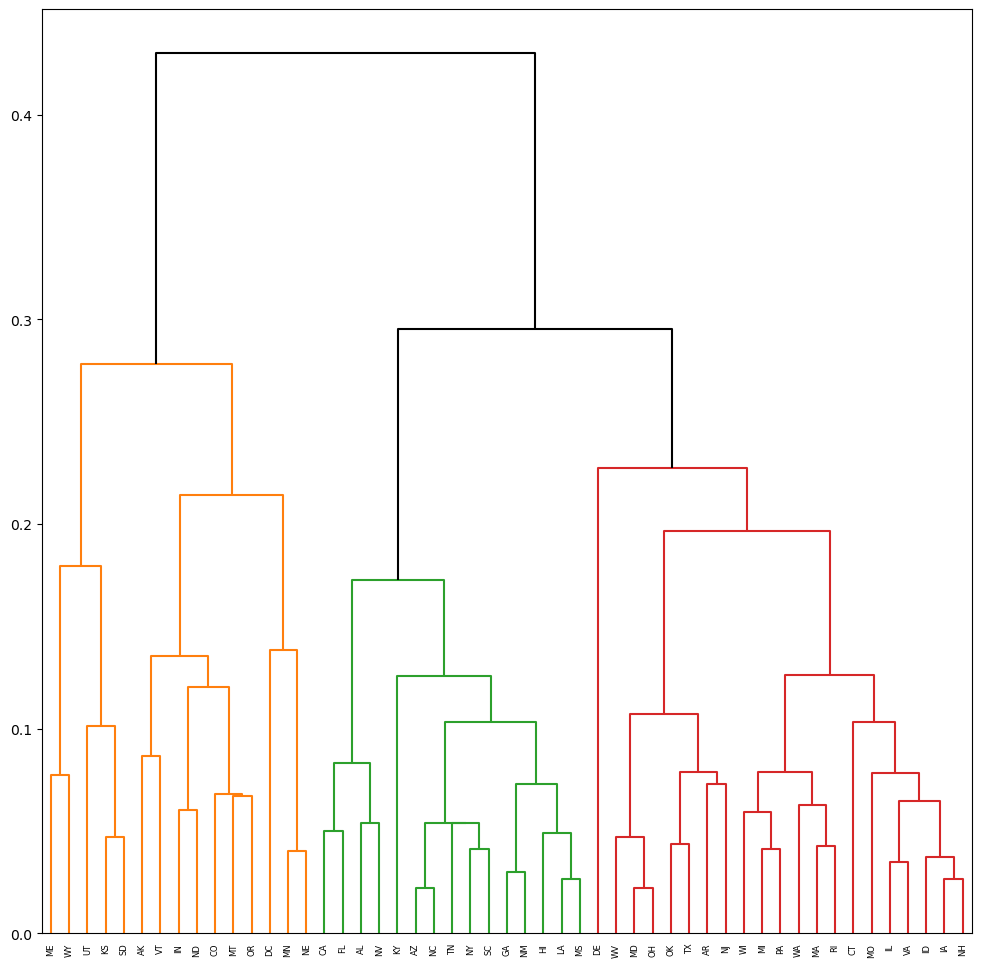

       cluster
State         
AL           0
AZ           0
CA           0
FL           0
GA           0
HI           0
LA           0
KY           0
MS           0
NV           0
NM           0
NY           0
SC           0
TN           0
NC           0
MN           1
NE           1
MT           1
KS           1
ME           1
IN           1
DC           1
WY           1
VT           1
OR           1
ND           1
SD           1
UT           1
CO           1
AK           1
CT           2
AR           2
NJ           2
NH           2
MO           2
MI           2
MA           2
MD           2
IL           2
IA           2
DE           2
ID           2
OK           2
PA           2
RI           2
TX           2
VA           2
OH           2
WA           2
WV           2
WI           2


In [35]:
cev = pd.read_csv('../data/CEV2021.csv')
#making state names act as row labels
cev = cev.set_index('State')

standard_cev = cev.iloc[:,:]
scaler = StandardScaler()
standard_cev = scaler.fit_transform(standard_cev)
standard_cev = pd.DataFrame(standard_cev)
standard_cev = standard_cev.set_index(cev.index)

HClust = AgglomerativeClustering
hc_standard = HClust(distance_threshold=0,
                 n_clusters=None,
                 metric = 'euclidean',
                 linkage='complete')
hc_standard.fit(standard_cev)

linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=cev.index,
           color_threshold= .29,
           above_threshold_color='black')
plt.show()

f_answer = standard_cev.iloc[:,:]
f_answer['cluster'] = cut_tree(linkage_comp, n_clusters=3)
f_answer = f_answer.iloc[:,-1]
f_answer = f_answer.to_frame()
f_answer = f_answer.sort_values(by='cluster')
print(f_answer)


### 3g
Cluster 0: CT, DE, IN, IA, ID, IL, MA, KS, MO, MI, NH, WA, SD, PA, RI, ND, VA, WI  
Cluster 1: MT, NE, DC, WY, OR, UT, VT, ME, AK, CO, MN  
Cluster 2: AR, HI, FL, NM, NJ, NV, MS, LA, KY, MD, GA, CA, AL, AZ, NY, OK, TX, NC, OH, TN, SC, WV

In [39]:
kmeans_std = KMeans(n_clusters=3,
                random_state=1,
                ).fit(standard_cev)
cluster_std_km = pd.DataFrame(kmeans_std.labels_)
cluster_std_km.index = standard_cev.index

g_answer = standard_cev.iloc[:,:]
g_answer['cluster'] = cluster_std_km
g_answer = g_answer.iloc[:,-1]
g_answer = g_answer.to_frame()
g_answer_sorted = g_answer.sort_values(by='cluster')

print(g_answer_sorted)

       cluster
State         
CT           0
DE           0
IN           0
IA           0
ID           0
IL           0
MA           0
KS           0
MO           0
MI           0
NH           0
WA           0
SD           0
PA           0
RI           0
ND           0
VA           0
WI           0
MT           1
NE           1
DC           1
WY           1
OR           1
UT           1
VT           1
ME           1
AK           1
CO           1
MN           1
AR           2
HI           2
FL           2
NM           2
NJ           2
NV           2
MS           2
LA           2
KY           2
MD           2
GA           2
CA           2
AL           2
AZ           2
NY           2
OK           2
TX           2
NC           2
OH           2
TN           2
SC           2
WV           2


c:\Users\1yjac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 4h

C:\Users\1yjac\AppData\Local\Temp\ipykernel_8400\1950266707.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == 0:
C:\Users\1yjac\AppData\Local\Temp\ipykernel_8400\1950266707.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == 1:
C:\Users\1yjac\AppData\Local\Temp\ipykernel_8400\1950266707.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == 2:
C:\Users\1yjac\AppData\Local\Temp\ipykernel_8400\1

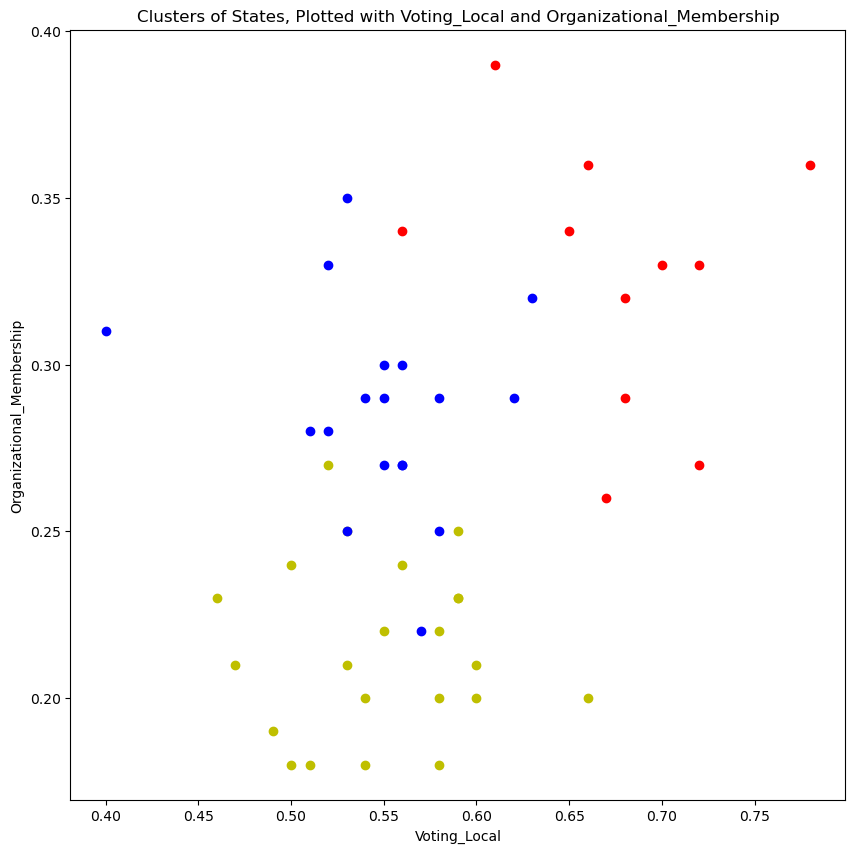

In [47]:
g_answer['Voting_Local'] = cev.loc[:, 'Voting_Local']
g_answer['Organization_Membership'] = cev.loc[:, 'Organizational_Membership']


fig, ax = plt.subplots(1, 1, figsize=(10,10))

for index, row in g_answer.iterrows():
    if row[0] == 0:
        ax.scatter(row[1], row[2], c = 'b')
    if row[0] == 1:
        ax.scatter(row[1], row[2], c = 'r')
    if row[0] == 2:
        ax.scatter(row[1], row[2], c = 'y')

ax.set_title("Clusters of States, Plotted with Voting_Local and Organizational_Membership")
ax.set_xlabel('Voting_Local')
ax.set_ylabel('Organizational_Membership')

plt.show()